In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
df = pd.read_csv('drive/MyDrive/Major Project/dataset_processed.csv',index_col = 'Index' )

CPU times: user 22.1 s, sys: 2.46 s, total: 24.6 s
Wall time: 32.4 s


In [ ]:
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
1,-0.474824,-0.039780,-0.505322,0.639275,0.0,0.090561,-0.333333,-0.325408,-0.157811,0.156726,...,0.085627,-0.038686,0.070901,-0.25,-0.087360,0.459388,0.666667,0.666667,0.333333,0.0
2,-1.318108,0.327812,-0.482927,0.688948,0.0,-0.304530,0.000000,0.188385,-0.364190,0.145798,...,0.364733,4.165028,0.925335,0.25,-0.384190,-0.618739,-0.166667,0.866667,-0.333333,0.0
4,0.573975,-0.001478,1.168774,0.132133,0.0,1.502342,0.000000,-0.349548,-0.571666,0.469348,...,-0.033211,0.158986,-0.367976,0.50,-0.095336,0.382246,0.166667,0.866667,-0.416667,0.0
7,-0.170791,-0.041258,0.989211,0.078292,0.0,-0.366133,-0.666667,-0.276246,0.249174,-0.087689,...,-0.920689,-0.038734,-0.192986,0.25,-0.043869,0.046575,-0.833333,-0.333333,-0.666667,0.0
9,-0.311537,0.014160,-0.536017,-0.237329,0.0,-0.533354,-0.666667,-0.271449,0.069038,0.075861,...,-0.962446,-0.038681,-0.571914,0.25,-0.363691,-1.218491,-0.833333,-0.600000,0.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001471 entries, 1 to 5956840
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   float64
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  float64
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   float64
 20  Day                     float64
 21  Time of Day             float64
 22 

In [ ]:
X = df.drop('Target', axis = 1)
y = df.Target

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

rus = RandomUnderSampler(sampling_strategy = 'auto',
                         random_state = 42)

X_resampled, y_resampled = rus.fit_resample(X, y)

X_sampled, X_test, y_sampled, y_test = train_test_split(X_resampled,
                                                        y_resampled,
                                                        test_size= None,
                                                        random_state = 42)

selector = SelectKBest(score_func = f_classif, k = 'all')
X_selected = selector.fit_transform(X_sampled, y_sampled)

feature_scores = pd.DataFrame({
    'Feature': X_sampled.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending = False)

print("Top Features based on SelectKBest scoring:")
print(feature_scores.head())

Top Features based on SelectKBest scoring:
      Feature          Score
14  Manganese  173300.617779
7   Turbidity  133688.008932
9      Copper  103271.876306
1        Iron   96262.080394
3    Chloride   89801.123673


In [ ]:
len(X_selected), len(X_sampled), len(X_resampled), len(X)

(1812720, 1812720, 2416960, 4001471)

In [ ]:
feature_scores

,Feature,Score
14,Manganese,173300.617779
7,Turbidity,133688.008932
9,Copper,103271.876306
1,Iron,96262.080394
3,Chloride,89801.123673
10,Odor,58786.285674
8,Fluoride,51560.527281
2,Nitrate,51487.316146
6,Color,46497.174775
13,Chlorine,39025.686665


In [ ]:
feature_scores.to_csv('drive/MyDrive/Major Project/KNN.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')


Mounted at drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
%%time
features = pd.read_csv('drive/MyDrive/Major Project/KNN.csv')
important_features = features['Feature'].to_list()

CPU times: user 3.25 ms, sys: 92 µs, total: 3.34 ms
Wall time: 9.45 ms


In [ ]:
%%time
data = pd.read_csv('drive/MyDrive/Major Project/dataset_processed.csv', index_col = 'Index')
target = 'Target'

CPU times: user 14.8 s, sys: 1.14 s, total: 15.9 s
Wall time: 23.4 s


In [ ]:
def load_data(data, important_features, target, n):
  feat = important_features[:n]
  X = data[feat]
  y = data[target]
  return X , y

In [ ]:
def balance_data(X, y):
  rus = RandomUnderSampler(sampling_strategy = 'auto',
                           random_state = 42)
  X_resampled, y_resampled = rus.fit_resample(X,y)
  return X_resampled, y_resampled

In [ ]:
def train_evaluate_knn(X, y, n_neighbors = 5, test_size = 0.2):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print("Classification Report: \n", classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize = (8,6))
  sns.heatmap(cm,
              annot = True,
              fmt = 'd',
              cmap = 'Blues',
              cbar = False,
              xticklabels = knn.classes_,
              yticklabels = knn.classes_)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def initiate(data, features, n_best, target = 'Target', n_neighbors = 5):
  X , y = load_data(data, features, target, n_best)

  X_balanced, y_balanced = balance_data(X,y)

  train_evaluate_knn(X_balanced, y_balanced, n_neighbors = n_neighbors)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80    241428
         1.0       0.81      0.77      0.79    241964

    accuracy                           0.80    483392
   macro avg       0.80      0.80      0.80    483392
weighted avg       0.80      0.80      0.80    483392



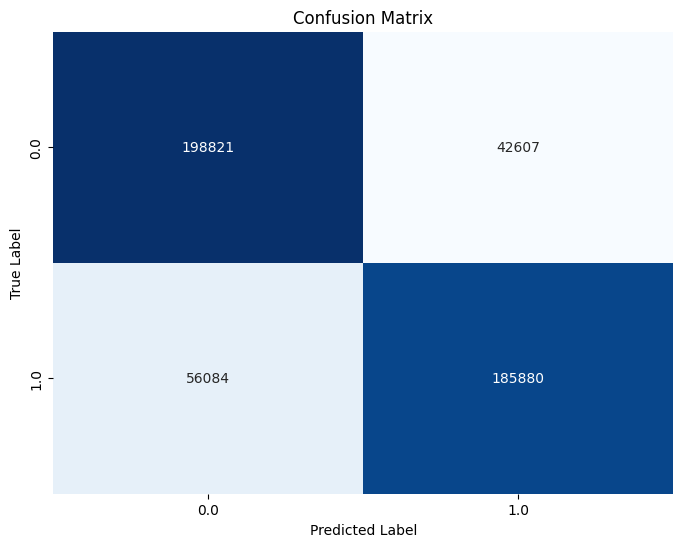

In [ ]:
n_best = 5
initiate(data, important_features, target = target, n_best = n_best)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84    241428
         1.0       0.84      0.83      0.83    241964

    accuracy                           0.84    483392
   macro avg       0.84      0.84      0.84    483392
weighted avg       0.84      0.84      0.84    483392



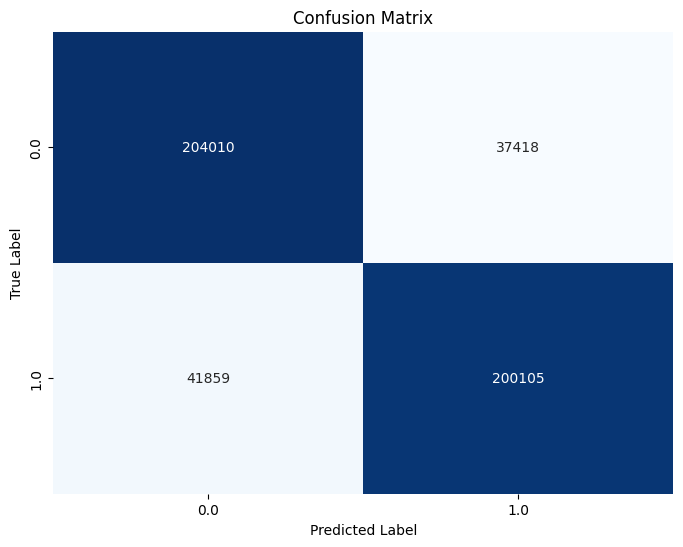

In [ ]:
n_best1 = 7
initiate(data, important_features, target = target, n_best = n_best1)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85    241428
         1.0       0.85      0.85      0.85    241964

    accuracy                           0.85    483392
   macro avg       0.85      0.85      0.85    483392
weighted avg       0.85      0.85      0.85    483392



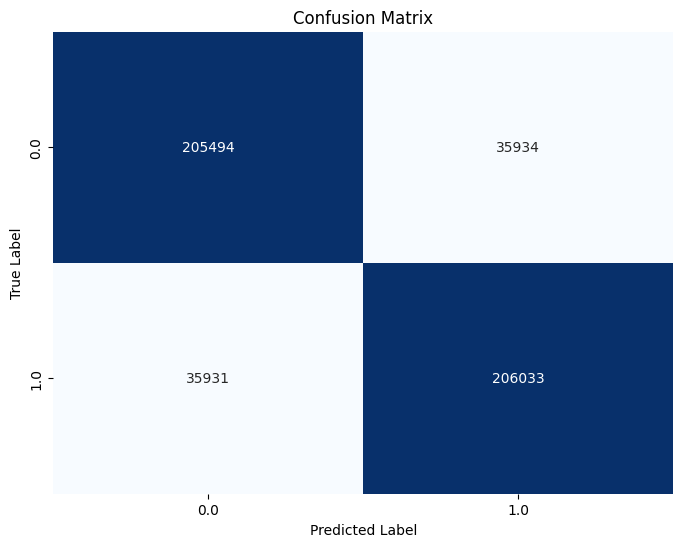

In [ ]:
n_best2 = 10
initiate(data, important_features, target = target, n_best = n_best2)